Playground
==

You can test the model here

In [21]:
# build & run test
!./scripts/build_n_test.sh

-- pybind11 v2.9.1 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/nfs_home/blender/repos/DummyML/build
Scanning dependencies of target dummyml
[ 14%] Building CXX object CMakeFiles/dummyml.dir/src/dummyml/dummyml.cpp.o
[ 28%] Building CXX object CMakeFiles/dummyml.dir/src/dummyml/k_means.cpp.o
[ 42%] Linking CXX shared module ../dummyml/dummyml.cpython-38-x86_64-linux-gnu.so
[100%] Built target dummyml
============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.1, pluggy-1.0.0
rootdir: /home/nfs_home/blender/repos/DummyML, configfile: pytest.ini, testpaths: tests
plugins: typeguard-2.13.3
collected 6 items                                                              

tests/test_dummy_classifier.py ..                                        [ 33%]
tests/test_dummy_regression.py .                                         [ 50%]
tests/test_k_means.py .                                       

In [2]:
# Before playing, make sure you already build the project
import dummyml
import numpy as np
import cv2
from matplotlib import pyplot as plt

Naive Bayes Classifier
---

In [3]:
dummyX = np.zeros((4,))
nb_classifier = dummyml.naive_bayes_classifier(0,0)

nb_classifier.load('model/myIRIS.dmy')
print("Result:",nb_classifier(dummyX))

[WARNING] naive_bayes_classifier Ctr: _class_number can't be zero, forced changed to 1.
Result: [4.27880778e-82 2.10843320e-01 7.89156680e-01]


K Means Clustering
---

(500, 750, 3)


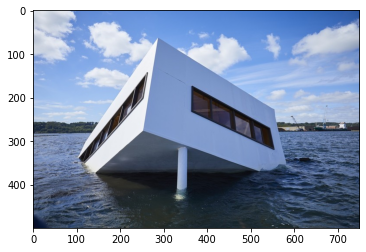

In [4]:
img = cv2.cvtColor(cv2.imread('./model/building2.jpg'), cv2.COLOR_BGR2RGB)
lenna = np.array(img, dtype=np.float64)/256
print(lenna.shape)
plt.imshow(img)
plt.show()

All inertia: [4123.215768980316, 4124.130921370921, 4237.740895467657, 4288.792792289265, 4100.946568725661, 4292.402147914137, 3220.2342893449027, 4226.396464918179, 4228.154203657989, 3892.620182510138]
pool # 6 , min Inertia =  3220.2342893449027
Final means:
 [[0.05348516 0.7568795  0.83735472]
 [0.06409325 0.35059711 0.12939172]
 [0.27266332 0.93027659 0.45806735]
 [0.2838301  0.46453718 0.04660766]
 [0.46895342 0.63326823 0.15834765]
 [0.92385409 0.23265874 0.14129696]]


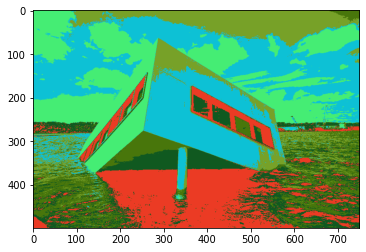

In [5]:
dataset_size = lenna.shape[0]*lenna.shape[1]
lennaX = lenna.flatten().reshape((dataset_size,3))
clusters = np.zeros((dataset_size,1),dtype=np.float64)
k = 6
pool = 10
kms_pool = [dummyml.k_means(3,k,np.random.rand(3*k)) for i in range(pool)]

for iter in range(20):
    for p in range(pool):
        kms_pool[p].fit(lennaX, clusters)

inertias = [kms_pool[p].sum_of_distance(lennaX) for p in range(pool)]
min_index = np.argmin(inertias)
print("All inertia:",inertias)
print("pool #",min_index,", min Inertia = ",inertias[min_index])

means = kms_pool[p].means()
print("Final means:\n",means)
flat = np.array([means[np.int8(cluster[0])] for cluster in clusters]).flatten()
new_img = flat.reshape(lenna.shape[0],lenna.shape[1],3)
plt.imshow(new_img)
plt.show()
